In [32]:
import pandas as pd
import seaborn as sns
import h2o

In [33]:
h2o.init()
h2o.remove_all()
h2o_train_frame = h2o.upload_file("winequality-red.csv")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,24 mins 43 secs
H2O cluster timezone:,America/Santiago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_maravenag_3wzuvj
H2O cluster total nodes:,1
H2O cluster free memory:,3.463 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


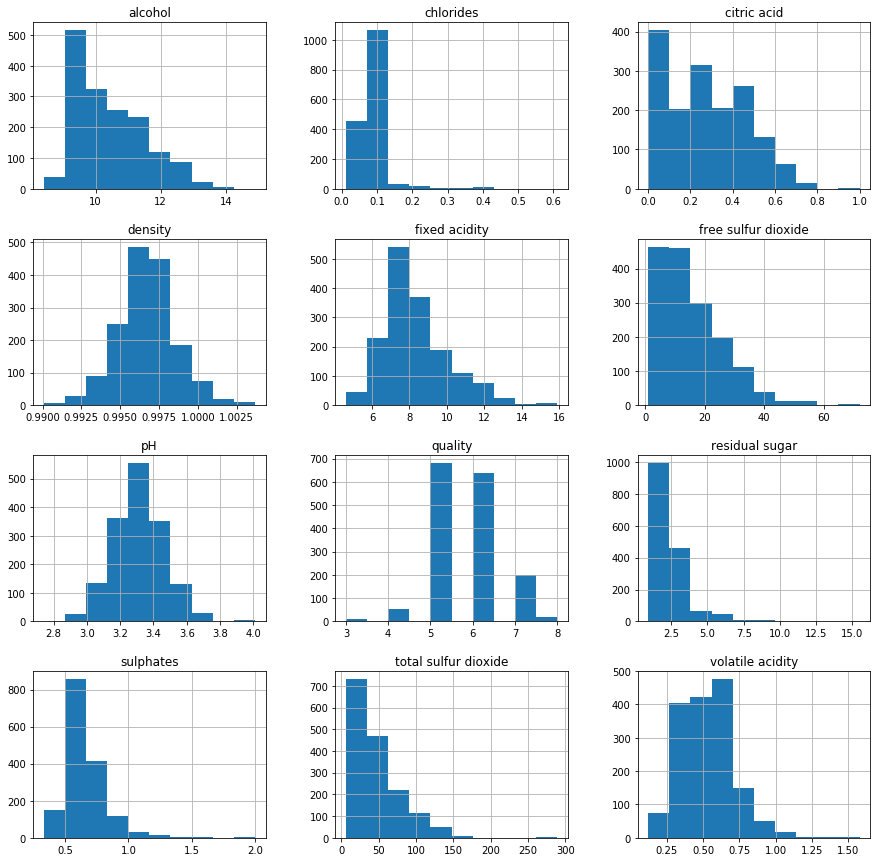

In [34]:
plots = h2o_train_frame.as_data_frame().hist(figsize=(15,15))

In [35]:
h2o_train_frame['quality'] = h2o_train_frame['quality']
train_cols = [x for x in h2o_train_frame.col_names if x not in['qality']]
#h2o_train_frame[train_cols] = h2o_train_frame[train_cols].scale()

In [36]:
train,test = h2o_train_frame.split_frame(ratios=[0.7],seed=1234)

In [37]:
train.head()

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5
5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5


### GBM

In [38]:
from h2o.estimators import H2OGradientBoostingEstimator
param = {
      "ntrees" : 1000
    , "max_depth" : 5
    , "learn_rate" : 0.01
    , "sample_rate" : 0.7
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 1
    }

In [39]:
model = H2OGradientBoostingEstimator(model_id="wine_qlty_gbm",**param)
model.train(x=train_cols,y="quality",training_frame=h2o_train_frame,validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
#model.confusion_matrix

In [40]:
train_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [41]:
h2o_train_frame.head()

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


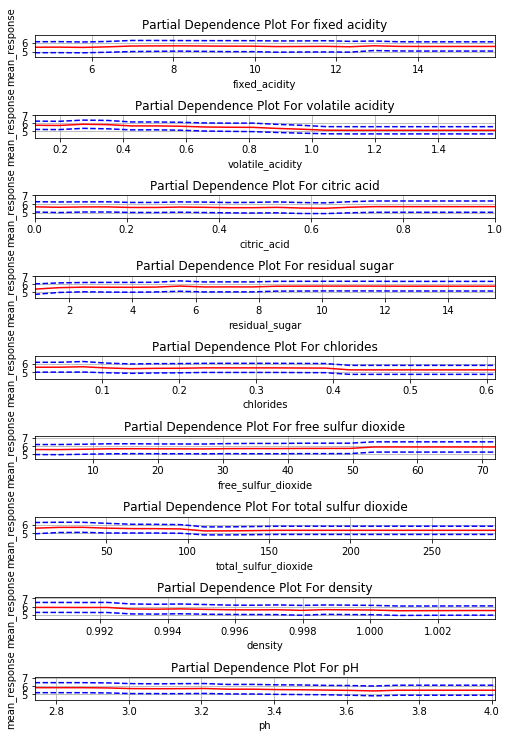

In [44]:
p = model.partial_plot(h2o_train_frame, cols=train_cols[0:9],include_na=True, plot=True)

In [10]:
model.download_mojo(get_genmodel_jar=True)

'/Users/maravenag/Desktop/kaggle/wine-regression/wine_qlty_gbm.zip'

### DeepLearning

In [53]:
data = pd.read_csv("winequality-red.csv")
h2o_deep_frame = h2o.H2OFrame(data)
h2o_deep_frame['quality'] = h2o_deep_frame['quality'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [54]:
deep_train,deep_test = h2o_deep_frame.split_frame(ratios=[0.7],seed=1234)

In [55]:
deep_train.head(5)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5


In [10]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [12]:
model = H2ODeepLearningEstimator(
    model_id="wine_qlty",
    hidden=[512,512],
    activation="Rectifier with dropout",
    hidden_dropout_ratios=[0.6,0.6],
    epochs=1000,
    adaptive_rate=True,
    rate=0.01,
    standardize=True,
    overwrite_with_best_model=True
)

In [13]:
model.train(x=train_cols,y="quality",training_frame=deep_train, validation_frame=deep_test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [116]:
model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  wine_qlty


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.35483625568367255
RMSE: 0.5956813373639236
LogLoss: 1.1903130581987706
Mean Per-Class Error: 0.6456307026254774
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



3,4,5,6,7,8,Error,Rate
2.0,1.0,2.0,0.0,0.0,0.0,0.6,3 / 5
0.0,10.0,22.0,3.0,0.0,0.0,0.7142857,25 / 35
0.0,11.0,431.0,43.0,0.0,0.0,0.1113402,54 / 485
0.0,25.0,232.0,191.0,2.0,0.0,0.5755556,259 / 450
0.0,8.0,40.0,94.0,4.0,0.0,0.9726027,142 / 146
0.0,2.0,1.0,6.0,0.0,1.0,0.9,9 / 10
2.0,57.0,728.0,337.0,6.0,1.0,0.4350133,492 / 1.131


Top-6 Hit Ratios: 


k,hit_ratio
1,0.5649868
2,0.8470380
3,0.9442971
4,0.9893899
5,0.9991158
6,1.0



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.4110809872520088
RMSE: 0.6411559773190989
LogLoss: 1.4583436510066834
Mean Per-Class Error: 0.7810002251491612
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



3,4,5,6,7,8,Error,Rate
0.0,1.0,4.0,0.0,0.0,0.0,1.0,5 / 5
0.0,2.0,15.0,1.0,0.0,0.0,0.8888889,16 / 18
0.0,11.0,168.0,17.0,0.0,0.0,0.1428571,28 / 196
0.0,7.0,115.0,65.0,1.0,0.0,0.6542553,123 / 188
0.0,3.0,16.0,34.0,0.0,0.0,1.0,53 / 53
0.0,0.0,0.0,8.0,0.0,0.0,1.0,8 / 8
0.0,24.0,318.0,125.0,1.0,0.0,0.4978632,233 / 468


Top-6 Hit Ratios: 


k,hit_ratio
1,0.5021368
2,0.8205128
3,0.9316239
4,0.9786325
5,0.9978633
6,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_classification_error
,2018-12-21 17:33:26,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-12-21 17:33:27,0.580 sec,20452 obs/sec,10.0,1,11310.0,0.5956813,1.1903131,0.4361021,0.4350133,0.6411560,1.4583437,0.4175404,0.4978632
,2018-12-21 17:33:32,5.972 sec,26742 obs/sec,140.0,14,158340.0,0.3069815,0.3057165,0.8502396,0.1175950,0.5960031,1.9152282,0.4966902,0.4252137
,2018-12-21 17:33:37,11.289 sec,28234 obs/sec,280.0,28,316680.0,0.1364502,0.0705077,0.9704117,0.0212202,0.5922004,2.8855140,0.5030923,0.4038462
,2018-12-21 17:33:43,16.477 sec,29000 obs/sec,420.0,42,475020.0,0.0605661,0.0207179,0.9941705,0.0035367,0.6000582,3.7447116,0.4898180,0.3867521
,2018-12-21 17:33:48,21.706 sec,29865 obs/sec,570.0,57,644670.0,0.0430383,0.0081183,0.9970564,0.0017683,0.6021469,4.6105941,0.4862601,0.3867521
,2018-12-21 17:33:53,26.827 sec,30514 obs/sec,720.0,72,814320.0,0.0748121,0.0626329,0.9911056,0.0053050,0.6067218,5.5003590,0.4784240,0.3824786
,2018-12-21 17:33:58,32.111 sec,31150 obs/sec,880.0,88,995280.0,0.0074875,0.0005443,0.9999109,0.0,0.6100669,6.0172557,0.4726568,0.3888889
,2018-12-21 17:33:58,32.136 sec,31148 obs/sec,880.0,88,995280.0,0.5956813,1.1903131,0.4361021,0.4350133,0.6411560,1.4583437,0.4175404,0.4978632


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
chlorides,1.0,1.0,0.0988836
total sulfur dioxide,0.9592590,0.9592590,0.0948549
sulphates,0.9580247,0.9580247,0.0947329
alcohol,0.9421075,0.9421075,0.0931589
fixed acidity,0.9183933,0.9183933,0.0908140
density,0.9023014,0.9023014,0.0892228
residual sugar,0.8963686,0.8963686,0.0886361
volatile acidity,0.8942093,0.8942093,0.0884226
free sulfur dioxide,0.8897216,0.8897216,0.0879788
citric acid,0.8880596,0.8880596,0.0878145


<bound method H2OMultinomialModel.confusion_matrix of >